Ingrid Edith Martínez Andrade 1995361     

Thursday N4-N6

#Linear Regression Project


* Predict House Prices taking into account medium income of the zone
* Datasets from scikit-learn
*  "train_test_split" function from the scikit-learn library will be used to generate the training data sets (train_data, train_labels) and test data sets (test_data, test_labels)

### **Step 1 : Import Libraries**

Primero que nada, realizamos la importación de las librerias con las que trabajemos a lo largo del proyecto




In [167]:

import numpy as np
import os
import pandas as pd

# Scikit-Learn Libraries
import sklearn.linear_model
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

#Libraries for graphics
import seaborn as sns
import matplotlib.pyplot as plt


##**Step 2: Load Data**


In [137]:
#Load the dataset
california = fetch_california_housing()
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['Precio'] = california.target

En este caso, como aplicaremos regresión lineal por lo tanto tendremos una variable dependiente e independiente.

In [138]:
# Seleccionar la variable independiente y dependiente
X = df[['MedInc']] # MedInc (Ingresos medios en la zona)

y = df['Precio']

### Data Preview and Analysis

In [139]:
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Precio
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [140]:
X.head()

,MedInc
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462


In [141]:
y.head()

,Precio
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


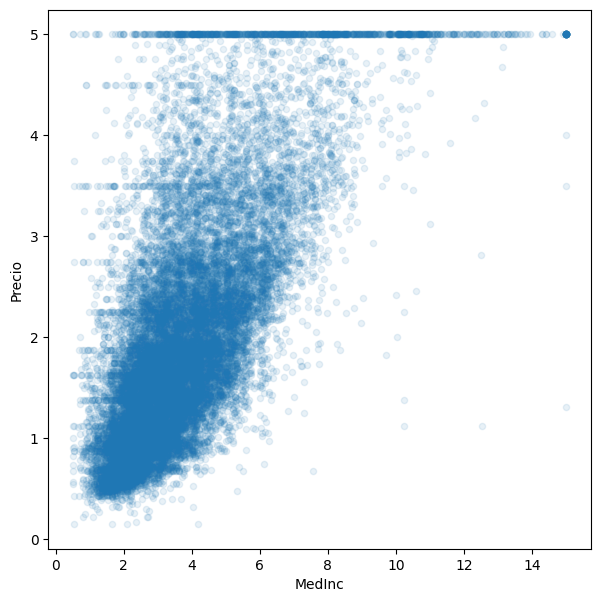

In [142]:
#data visualization
df.plot(kind="scatter", x="MedInc", y="Precio", alpha=0.1, figsize=(7,7))
plt.show()

First of all, we need to analyze the data we are going to work with. Therefore, we are going to use the method .info(), which prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [143]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MedInc  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [144]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: Precio
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


Also, we are going to apply the method .describe(), which generates descriptive statistics.


In [145]:
y.describe()

,Precio
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [146]:
X.describe()

,MedInc
count,20640.000000
mean,3.870671
std,1.899822
min,0.499900
25%,2.563400
50%,3.534800
75%,4.743250
max,15.000100


Another important aspect is that we have a good correlation between the variables.

Where:

* 0 to 0.1 - no correlation
* 0.1 to 0.3 - low correlation
* 0.3 to 0.5 - medium correlation
* 0.5 to 0.7 - high correlation
* 0.7 to 1 - very high correlation





In [147]:
corr_matrix = df.corr()
corr_matrix['MedInc'].sort_values(ascending=False)

,MedInc
MedInc,1.000000
Precio,0.688075
AveRooms,0.326895
AveOccup,0.018766
Population,0.004834
Longitude,-0.015176
AveBedrms,-0.062040
Latitude,-0.079809
HouseAge,-0.119034


## **Step 3: Data preprocessing**

In this case, we are going to apply to X:
1. scaling from 0 to 1
2. elimination of nulls // *In this case there are none*



In [148]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.53966842]
 [0.53802706]
 [0.46602805]
 ...
 [0.08276438]
 [0.09429525]
 [0.13025338]]


In [149]:
print(X_scaled.min())
print(X_scaled.max())

0.0
1.0


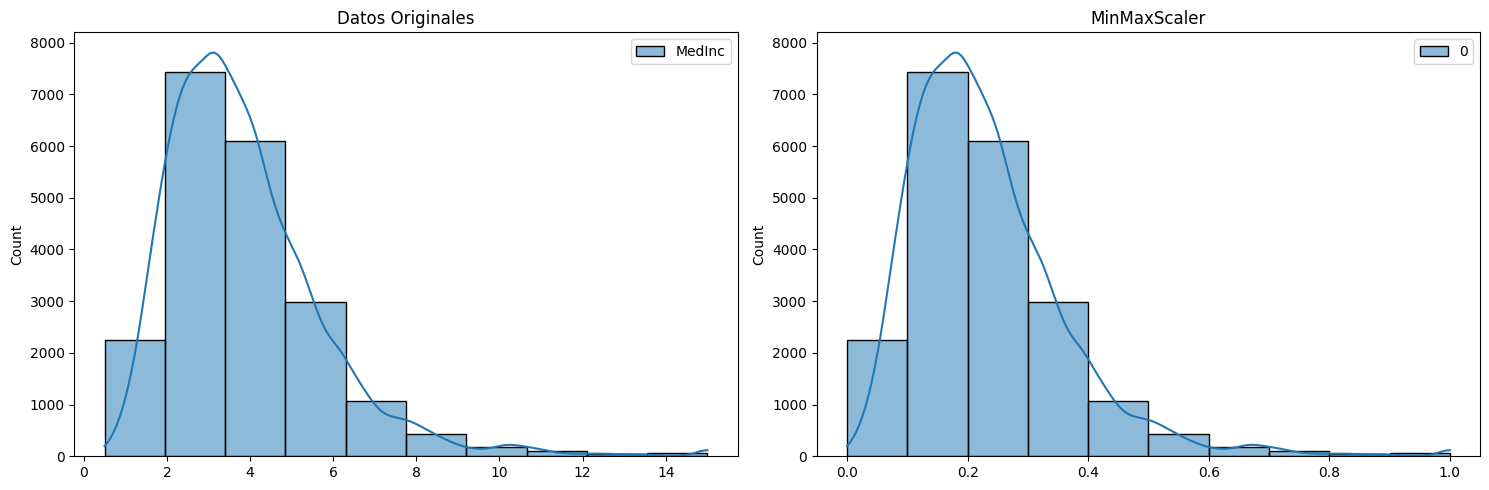

In [150]:
 # Visualización - Histogramas
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Datos originales
sns.histplot(X, bins=10, kde=True, ax=axs[0])
axs[0].set_title('Datos Originales')

# Datos escalados con MinMaxScaler
sns.histplot(X_scaled, bins=10, kde=True, ax=axs[1])
axs[1].set_title('MinMaxScaler')

plt.tight_layout()
plt.show()

### Split

During the data preprocessing, the "train_test_split" function from the scikit-learn library will be used to generate the training data sets (train_data, train_labels) and test data sets (test_data, test_labels). An 80% training and 20% testing ratio will be used.



In [151]:
#split function
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
len(X_scaled)

20640

In [152]:
len(X_train)

16512

In [153]:
len(X_test)

4128

## **Step 4: Model selection and training**

In [154]:
#model selection
model = sklearn.linear_model.LinearRegression()

In [155]:
#model training
model.fit(X_train, y_train)


LinearRegression()

## **Step 5: Model testing**

In [156]:
# Making predictions from the test set
y_pred = model.predict(X_test)

In [157]:
#Evaluate using mse
mse = mean_squared_error(y_test, y_pred)

In [158]:
print(f"Mean Squared Error (MSE): {mse:.3f}")

Mean Squared Error (MSE): 0.709


The smaller the MSE, the closer your model's predictions are to reality.There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect.

According to our trained model, the value of "y" for each "x" value is:

In [160]:
y_pred.view()

array([1.14958917, 1.50606882, 1.90393718, ..., 4.31500772, 1.612455  ,
       1.93412956])

Since we have an error of 0.7 MSE we are far from real values, which are:

In [161]:
y_test.head(10)

,Precio
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
13311,1.58700
7113,1.98200
7668,1.57500
18246,3.40000
5723,4.46600


Also we can give it a X value which corresponds to the 1st value of our test set, and then perform an evaluation the result.

In [162]:
X_test.view()

array([[0.08146784],
       [0.14009462],
       [0.2055282 ],
       ...,
       [0.60205376],
       [0.15759093],
       [0.21049365]])

In [163]:
X_value = [[0.08146784]] # se le otorga el atributo MedIncome y predice su precio
print('prediction:', model.predict(X_value))

prediction: [1.14958916]


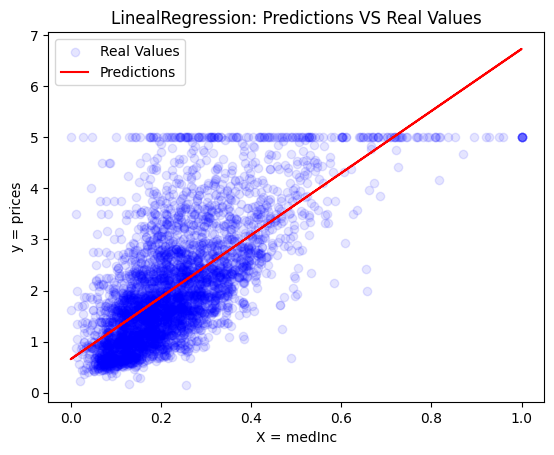

In [166]:
# Visualization
plt.scatter(X_test, y_test, color='blue', label='Real Values',  alpha=0.1)
plt.plot(X_test, y_pred, color='red', label='Predictions')
plt.xlabel('X = medInc')
plt.ylabel('y = prices')
plt.legend()
plt.title('LinealRegression: Predictions VS Real Values')
plt.show()

References:

Matthes, E. (2023). Python crash course. No starch press.

https://www.w3schools.com/python/default.asp

Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".